# Challenge 3

In this challenge we will work on the `Orders` data set. In your work you will apply the thinking process and workflow we showed you in Challenge 2.

You are serving as a Business Intelligence Analyst at the headquarter of an international fashion goods chain store. Your boss today asked you to do two things for her:

**First, identify two groups of customers from the data set.** The first group is **VIP Customers** whose **aggregated expenses** at your global chain stores are **above the 95th percentile** (aka. 0.95 quantile). The second group is **Preferred Customers** whose **aggregated expenses** are **between the 75th and 95th percentile**.

**Second, identify which country has the most of your VIP customers, and which country has the most of your VIP+Preferred Customers combined.**

## Q1: How to identify VIP & Preferred Customers?

We start by importing all the required libraries:

#### Import libraries and data frame

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import norm
import math
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
%matplotlib inline

Next, extract and import `Orders` dataset into a dataframe variable called `orders`. Print the head of `orders` to overview the data:

In [3]:
orders = pd.read_csv('orders.csv') #, index_col = 0)

In [4]:
orders.head(15)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,5,536365,22752,2010,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,6,536365,21730,2010,12,3,8,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,7,536366,22633,2010,12,3,8,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,8,536366,22632,2010,12,3,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [5]:
orders.index

RangeIndex(start=0, stop=397924, step=1)

In [6]:
# 0 column does not match the data frame indexes, let's save it

In [7]:
index0 = orders['Unnamed: 0']
index0

0              0
1              1
2              2
3              3
4              4
           ...  
397919    541904
397920    541905
397921    541906
397922    541907
397923    541908
Name: Unnamed: 0, Length: 397924, dtype: int64

In [8]:
# And drop it from orders
orders = orders.iloc[:,1:]
orders

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


### Identify two groups of customers

#### Aggregate expenses by customer

In [10]:
expByC = orders[['CustomerID','amount_spent']].groupby(['CustomerID']).agg({'amount_spent':sum})
expByC

,amount_spent
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,178.05


In [ ]:
# Watch the results

In [11]:
expByC.describe()

,amount_spent
count,4339.000000
mean,2053.793018
std,8988.248381
min,0.000000
25%,307.245000
50%,674.450000
75%,1661.640000
max,280206.020000


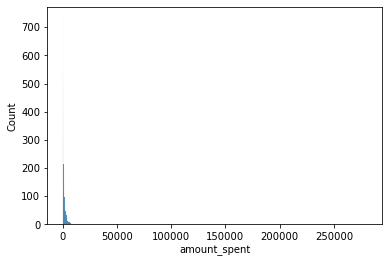

In [40]:
sns.histplot(expByC.amount_spent)
plt.show()

#### Identify the bins

In [13]:
labels = ['Standard','Preferred','VIP']
#pd.qcut(expByC.amount_spent, [0,0.75,0.95,1], labels=labels, retbins=True)
quantiles = pd.qcut(expByC.amount_spent, [0,0.75,0.95,1], labels=labels, retbins=True)
quantiles

(CustomerID
 12346          VIP
 12347    Preferred
 12348    Preferred
 12349    Preferred
 12350     Standard
            ...    
 18280     Standard
 18281     Standard
 18282     Standard
 18283    Preferred
 18287    Preferred
 Name: amount_spent, Length: 4339, dtype: category
 Categories (3, object): ['Standard' < 'Preferred' < 'VIP'],
 array([     0.   ,   1661.64 ,   5840.182, 280206.02 ]))

In [ ]:
# Watch the results of the bins

In [14]:
quantiles[1]

array([     0.   ,   1661.64 ,   5840.182, 280206.02 ])

In [15]:
display(quantiles[0])
quantiles[0].value_counts()

CustomerID
12346          VIP
12347    Preferred
12348    Preferred
12349    Preferred
12350     Standard
           ...    
18280     Standard
18281     Standard
18282     Standard
18283    Preferred
18287    Preferred
Name: amount_spent, Length: 4339, dtype: category
Categories (3, object): ['Standard' < 'Preferred' < 'VIP']

Standard     3254
Preferred     868
VIP           217
Name: amount_spent, dtype: int64

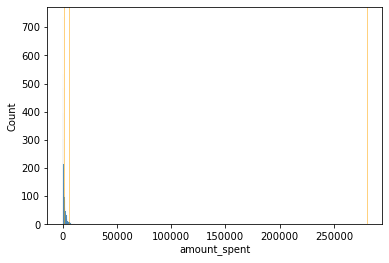

In [39]:
for x in quantiles[1][1:]:
    plt.axvline(x, color = 'orange', linewidth=0.5)
sns.histplot(expByC.amount_spent)
plt.show()

In [41]:
quantiles[0].value_counts()

Standard     3254
Preferred     868
VIP           217
Name: amount_spent, dtype: int64

#### create a new data frame with column customer_type

In [25]:
customer_type = pd.DataFrame(quantiles[0]) #, columns = ['CustomerID','customer_type'])
customer_type.reset_index(inplace=True)
customer_type.rename(columns={'amount_spent':'customer_type'}, inplace=True)
customer_type

,CustomerID,customer_type
0,12346,VIP
1,12347,Preferred
2,12348,Preferred
3,12349,Preferred
4,12350,Standard
...,...,...
4334,18280,Standard
4335,18281,Standard
4336,18282,Standard
4337,18283,Preferred


#### Merge the data frames

In [28]:
orders2 = orders.merge(customer_type, how='left', on= 'CustomerID')
orders2

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,customer_type
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Preferred
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Preferred
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Preferred
3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Preferred
4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Preferred
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20,Standard
397920,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60,Standard
397921,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Standard
397922,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Standard


In [ ]:
# watch the results

In [29]:
# Just check a row
orders2[orders2.CustomerID == 12346]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,customer_type
37126,541431,23166,2011,1,2,10,medium ceramic top storage jar,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,VIP


In [46]:
# How much spend each VIP
orders2[orders2.customer_type == 'VIP'].groupby('CustomerID').agg({'amount_spent':sum}).sort_values('amount_spent', ascending=False)


,amount_spent
CustomerID,
14646,280206.02
18102,259657.30
17450,194550.79
16446,168472.50
14911,143825.06
...,...
14505,5905.64
14415,5900.28
14944,5900.25


In [45]:
# How much spend each Preferred
orders2[orders2.customer_type == 'Preferred'].groupby('CustomerID').agg({'amount_spent':sum}).sort_values('amount_spent', ascending=False)


,amount_spent
CustomerID,
13050,5836.86
12720,5781.73
15218,5756.89
17686,5739.46
13178,5725.47
...,...
17656,1674.69
16115,1667.97
12912,1662.30


In [44]:
# How much spend each customer type
orders2.groupby('customer_type').agg({'amount_spent':sum}).sort_values('amount_spent', ascending=False)

,amount_spent
customer_type,
VIP,4489400.210
Preferred,2562145.441
Standard,1859862.253


### Which country has the most VIP and most VIP+Preferred

In [ ]:
# The most VIP

#### Group by country and customer type

In [60]:
orders2.groupby(['Country','customer_type']).agg({'CustomerID':pd.Series.nunique,'amount_spent':sum})

CustomerID  amount_spent
Country        customer_type                          
Australia      Standard              5.0      3550.490
               Preferred             2.0      4541.620
               VIP                   2.0    130429.200
Austria        Standard              8.0      6821.440
               Preferred             3.0      3377.240
...                                  ...           ...
United Kingdom Preferred           755.0   2206713.761
               VIP                 177.0   3417798.950
Unspecified    Standard              4.0      2667.070
               Preferred             NaN         0.000
               VIP                   NaN         0.000

[111 rows x 2 columns]

In [61]:
# Check the index
orders2.groupby(['Country','customer_type']).agg({'CustomerID':pd.Series.nunique,'amount_spent':sum}).index


MultiIndex([(           'Australia',  'Standard'),
            (           'Australia', 'Preferred'),
            (           'Australia',       'VIP'),
            (             'Austria',  'Standard'),
            (             'Austria', 'Preferred'),
            (             'Austria',       'VIP'),
            (             'Bahrain',  'Standard'),
            (             'Bahrain', 'Preferred'),
            (             'Bahrain',       'VIP'),
            (             'Belgium',  'Standard'),
            ...
            (                 'USA',       'VIP'),
            ('United Arab Emirates',  'Standard'),
            ('United Arab Emirates', 'Preferred'),
            ('United Arab Emirates',       'VIP'),
            (      'United Kingdom',  'Standard'),
            (      'United Kingdom', 'Preferred'),
            (      'United Kingdom',       'VIP'),
            (         'Unspecified',  'Standard'),
            (         'Unspecified', 'Preferred'),
            (  

#### Reset indexes!

In [79]:
groupedCustomers = orders2.groupby(['Country','customer_type']).agg({'CustomerID':pd.Series.nunique,'amount_spent':sum})
groupedCustomers = groupedCustomers.reset_index()
groupedCustomers


,Country,customer_type,CustomerID,amount_spent
0,Australia,Standard,5.0,3550.490
1,Australia,Preferred,2.0,4541.620
2,Australia,VIP,2.0,130429.200
3,Austria,Standard,8.0,6821.440
4,Austria,Preferred,3.0,3377.240
...,...,...,...,...
106,United Kingdom,Preferred,755.0,2206713.761
107,United Kingdom,VIP,177.0,3417798.950
108,Unspecified,Standard,4.0,2667.070
109,Unspecified,Preferred,NaN,0.000


In [80]:
# Create an alias
gc = groupedCustomers

In [93]:
# Rename columns
gc.rename(columns={'CustomerID':'num_customers'}, inplace=True)
gc.head()

,Country,customer_type,num_customers,amount_spent
0,Australia,Standard,5.0,3550.49
1,Australia,Preferred,2.0,4541.62
2,Australia,VIP,2.0,130429.20
3,Austria,Standard,8.0,6821.44
4,Austria,Preferred,3.0,3377.24


#### Filter VIP and sort

In [99]:
gc[gc.customer_type == 'VIP'].sort_values('num_customers',ascending=False).head(5)

,Country,customer_type,num_customers,amount_spent
107,United Kingdom,VIP,177.0,3417798.95
44,Germany,VIP,10.0,100587.33
41,France,VIP,9.0,106383.09
98,Switzerland,VIP,3.0,26315.86
92,Spain,VIP,2.0,25391.20


#### The most VIP + Preferred

In [95]:
# filter
gc2 = gc[(gc.customer_type == 'Preferred') | (gc.customer_type == 'Preferred')]
gc2

,Country,customer_type,num_customers,amount_spent
1,Australia,Preferred,2.0,4541.620
4,Austria,Preferred,3.0,3377.240
7,Bahrain,Preferred,NaN,0.000
10,Belgium,Preferred,11.0,31184.220
13,Brazil,Preferred,NaN,0.000
16,Canada,Preferred,1.0,2940.040
19,Channel Islands,Preferred,3.0,6048.510
22,Cyprus,Preferred,3.0,5360.090
25,Czech Republic,Preferred,NaN,0.000
28,Denmark,Preferred,2.0,6727.720


In [100]:
# groupby and sort
gc2.groupby(['Country']).num_customers.agg(sum).sort_values(ascending=False)[:5]

Country
United Kingdom    755.0
Germany            29.0
France             20.0
Belgium            11.0
Spain               7.0
Name: num_customers, dtype: float64

In [ ]:
# test code

In [85]:
gc

,Country,customer_type,CustomerID,amount_spent
0,Australia,Standard,5.0,3550.490
1,Australia,Preferred,2.0,4541.620
2,Australia,VIP,2.0,130429.200
3,Austria,Standard,8.0,6821.440
4,Austria,Preferred,3.0,3377.240
...,...,...,...,...
106,United Kingdom,Preferred,755.0,2206713.761
107,United Kingdom,VIP,177.0,3417798.950
108,Unspecified,Standard,4.0,2667.070
109,Unspecified,Preferred,NaN,0.000


In [ ]:
# Ignacio's code

In [62]:
# Try to order
orders2.groupby(['Country','customer_type']).agg({'CustomerID':pd.Series.nunique,'amount_spent':sum}).sort_values('VIP',axis=0,ascending=False)

KeyError: 'VIP'

In [68]:
orders3 = orders2.groupby(['Country','customer_type']).agg({'CustomerID':pd.Series.nunique}).reset_index().copy()

In [72]:
filerted_orders = orders3[orders3['customer_type'].isin(['Preferred','VIP'])].rename(columns={"CustomerID":"Number_of_clients"})

In [78]:
filerted_orders['Number_of_clients'] = filerted_orders['Number_of_clients'].fillna(0)
filerted_orders.sort_values(by='Number_of_clients',ascending=False)

,Country,customer_type,Number_of_clients
106,United Kingdom,Preferred,755.0
107,United Kingdom,VIP,177.0
43,Germany,Preferred,29.0
40,France,Preferred,20.0
10,Belgium,Preferred,11.0
...,...,...,...
62,Lebanon,VIP,0.0
64,Lithuania,Preferred,0.0
65,Lithuania,VIP,0.0
68,Malta,VIP,0.0


In [53]:
# test code
orders2.pivot_table(index= ['Country','customer_type'])

CustomerID      InvoiceNo   Quantity  \
Country              customer_type                                           
Australia            Standard       12709.719745  554500.292994  12.063694   
                     Preferred      12396.307692  557613.423077  16.938462   
                     VIP            12418.242762  556316.237194  89.212695   
Austria              Standard       12617.466667  563396.100000  14.445833   
                     Preferred      12369.677215  560805.405063   8.949367   
...                                          ...            ...        ...   
United Arab Emirates Standard       14984.588235  555856.176471  14.441176   
United Kingdom       Standard       15645.593105  561577.952701   7.981147   
                     Preferred      15644.424620  560222.946220   9.816493   
                     VIP            15255.392136  559979.601580  22.106278   
Unspecified          Standard       13721.500000  559110.053279   7.331967   

                                    UnitPrice  amount_spent       day  \
Country              customer_type                                      
Australia            Standard        2.857707     22.614586  3.554140   
                     Preferred       2.778385     34.935538  3.853846   
                     VIP             3.120991    145.244098  3.247216   
Austria              Standard        4.404000     28.422667  3.004167   
                     Preferred       4.031266     21.374937  2.436709   
...                                       ...           ...       ...   
United Arab Emirates Standard        3.380735     27.974706  2.676471   
United Kingdom       Standard        2.883783     12.688410  3.810956   
                     Preferred       2.868604     16.054665  3.665013   
                     VIP             3.245338     40.598669  3.337851   
Unspecified          Standard        3.200820     10.930615  3.024590   

                                         hour     month         year  
Country              customer_type                                    
Australia            Standard       11.445860  5.732484  2010.949045  
                     Preferred      12.230769  5.938462  2011.000000  
                     VIP            11.269488  6.138085  2010.973274  
Austria              Standard       12.608333  7.704167  2011.000000  
                     Preferred      11.506329  7.500000  2010.949367  
...                                       ...       ...          ...  
United Arab Emirates Standard       14.735294  5.911765  2011.000000  
United Kingdom       Standard       12.909788  7.933871  2010.927564  
                     Preferred      12.750331  7.485529  2010.937163  
                     VIP            12.749777  7.455342  2010.932375  
Unspecified          Standard       14.774590  6.475410  2011.000000  

[76 rows x 9 columns]

---

"Identify VIP and Preferred Customers" is the non-technical goal of your boss. You need to translate that goal into technical languages that data analysts use:

## How to label customers whose aggregated `amount_spent` is in a given quantile range?


We break down the main problem into several sub problems:

#### Sub Problem 1: How to aggregate the  `amount_spent` for unique customers?

#### Sub Problem 2: How to select customers whose aggregated `amount_spent` is in a given quantile range?

#### Sub Problem 3: How to label selected customers as "VIP" or "Preferred"?

*Note: If you want to break down the main problem in a different way, please feel free to revise the sub problems above.*

Now in the workspace below, tackle each of the sub problems using the iterative problem solving workflow. Insert cells as necessary to write your codes and explain your steps.

In [ ]:
# Already answered above

Now we'll leave it to you to solve Q2 & Q3, which you can leverage from your solution for Q1:

## Q2: How to identify which country has the most VIP Customers?

In [ ]:
# Already answered above

## Q3: How to identify which country has the most VIP+Preferred Customers combined?

In [ ]:
# Already answered above